***ICE Video Game Sales EDA***

**Project Description**

Working with a store called ice that 
sells video games all over the world. I'm looking to identify patterns that determine whether a game succeeds or not. Over all the 
goal is to plan a campaign for 2017 based on the findings of the 
dataset.

In [2]:

# Importing necessary libraries for data analysis and modeling
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np


In [3]:

# Load the dataset and inspect its structure
df = pd.read_csv('games.csv')
df.info()  # Display dataset summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Preparing the Data: After looking at the data set there are a few things we can fix.*** 
1. setting all the columns to lowercase
2. making year_of_release data type an int instead of float
3. setting user_score to be numeric
4. While looking at the data I saw a DS game released in 1985. The releaes date for the DS platform itself was November 21st 2004. The correct release date of the game "Strongest Tokyo University Shogi DS" was in 2010. !*Just changing the date from 1985 to 2010*!



In [5]:
#1 - setting the columns names to lower case
df.columns = df.columns.str.lower()

In [6]:
#2 - changing year_of_release data type to Int64
df['year_of_release'].astype('Int64')

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16715, dtype: Int64

In [7]:
#3 - setting user_score to numeric
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [8]:
#4 - changing the year of a record to the correct date
ds_games = df[df['platform'] == 'DS']


#Display the specific record with year_of_release as 1985 and platform as DS before modification
print("Before modification:")
print(df[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')])

index_to_modify = df[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')].index[0]

#Change the year_of_release from 1985 to 2010 for the specific record
df.loc[index_to_modify, 'year_of_release'] = 2010

#Display the specific record with year_of_release as 2010 after modification
print("\nAfter modification:")
print(df.loc[index_to_modify])


df.info()


Before modification:
                                      name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS           1985.0  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0           NaN         NaN   

      rating  
15957    NaN  

After modification:
name               Strongest Tokyo University Shogi DS
platform                                            DS
year_of_release                                 2010.0
genre                                           Action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                       NaN
user_score                                         NaN
rating                                             NaN
Name:

***Preparing the Data: Now its time for Missing Values.***

After taking a look at the df.info output we can see that we are missing values in:
1. name - removing both records that have missing names            
2. year_of_release - using the median to fill in missing values
3. genre - removing both records that have missing genres             
4. critic_score - using the mean to fill in missing values
5. user_score - using the mean to fil i missing values
6. rating - using the mode to fill in missing values




In [10]:
df.dropna(subset=['name'], inplace=True) #dropping names / genre missing values 

df.dropna(subset=['year_of_release'], inplace=True) #dropping year_of_release

df.dropna(subset=['critic_score'], inplace=True)#dropping critc_score

df.dropna(subset=['user_score'], inplace=True)#dropping user_score

df.dropna(subset=['rating'], inplace=True)#dropping rating


df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6826 entries, 0 to 16702
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6826 non-null   object 
 1   platform         6826 non-null   object 
 2   year_of_release  6826 non-null   float64
 3   genre            6826 non-null   object 
 4   na_sales         6826 non-null   float64
 5   eu_sales         6826 non-null   float64
 6   jp_sales         6826 non-null   float64
 7   other_sales      6826 non-null   float64
 8   critic_score     6826 non-null   float64
 9   user_score       6826 non-null   float64
 10  rating           6826 non-null   object 
dtypes: float64(7), object(4)
memory usage: 639.9+ KB


***Preparing the Data: Next we will look for duplicate values / records.***

This we have to be careful becuase some games might do something like a re-releases / expansion packs / remasters etc. For that reason we have to use the following columns. 
1.  look at the duplicate values in the columns: name, platform, year of release.
2.  print out the duplicate values
3.  drop the duplicate record in '16230
4.  insure its been dropped

After the records lets check the unique values for each column to check for cases like 'ps3' 'PS3'.
5. creating a function that check certain columns for the unique values in them



In [12]:
#1 - Looking at all the unique values
duplicates = df[df.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

In [13]:
#2 - Printing duplicates
print("Duplicate entries based on 'name' and 'platform' and 'year_of_release':")
print(duplicates[['name', 'platform', 'year_of_release']])

Duplicate entries based on 'name' and 'platform' and 'year_of_release':
                name platform  year_of_release
604    Madden NFL 13      PS3           2012.0
16230  Madden NFL 13      PS3           2012.0


In [14]:
#3 - Dropping the duplicate value
df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)

In [15]:
#4 - Checking if record was dropped
print(df[df['name'] == 'Madden NFL 13'])

               name platform  year_of_release   genre  na_sales  eu_sales  \
507   Madden NFL 13     X360           2012.0  Sports      2.53      0.15   
604   Madden NFL 13      PS3           2012.0  Sports      2.11      0.22   
5887  Madden NFL 13      PSV           2012.0  Sports      0.28      0.00   
7066  Madden NFL 13     WiiU           2012.0  Sports      0.21      0.00   

      jp_sales  other_sales  critic_score  user_score rating  
507        0.0         0.17          81.0         5.8      E  
604        0.0         0.23          83.0         5.5      E  
5887       0.0         0.02          63.0         7.3      E  
7066       0.0         0.02          75.0         6.7      E  


In [16]:
#5 - Function that checks the selected columns for unique values and prints them out
def print_unique_values(df):
    columns_to_check = ['platform', 'genre', 'rating', 'user_score']
    for column in columns_to_check:
            unique_values = df[column].unique()
            print(f"Unique entries in '{column}' column:")
            print(unique_values)
            print()  
print_unique_values(df)

Unique entries in 'platform' column:
['Wii' 'DS' 'X360' 'PS3' 'PS2' '3DS' 'PS4' 'PS' 'XB' 'PC' 'PSP' 'WiiU'
 'GC' 'GBA' 'XOne' 'PSV' 'DC']

Unique entries in 'genre' column:
['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Puzzle' 'Shooter'
 'Fighting' 'Simulation' 'Role-Playing' 'Adventure' 'Strategy']

Unique entries in 'rating' column:
['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']

Unique entries in 'user_score' column:
[8.  8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3 4.8
 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8 6.9
 9.4 6.8 6.1 6.7 5.4 4.  9.3 6.2 4.2 6.  4.9 3.7 4.1 5.8 5.6 5.5 4.4 4.6
 5.9 3.9 3.1 2.9 5.2 3.3 4.5 5.1 3.5 2.5 1.9 2.2 2.  9.5 4.7 2.1 3.6 1.8
 3.8 3.  9.6 2.8 1.7 2.7 2.4 1.5 1.2 2.3 0.5 0.6 0.9 1.  1.4 1.3 0.7]



***Preparing the Data: Last thing we want to create a total_sales column for the dataframe***
1. Adding a new column to the data called total_sales

In [18]:
#1 - Making a new column with the total sales for each game.
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
#Print to make sure total columns is corret
df.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6825 non-null   object 
 1   platform         6825 non-null   object 
 2   year_of_release  6825 non-null   float64
 3   genre            6825 non-null   object 
 4   na_sales         6825 non-null   float64
 5   eu_sales         6825 non-null   float64
 6   jp_sales         6825 non-null   float64
 7   other_sales      6825 non-null   float64
 8   critic_score     6825 non-null   float64
 9   user_score       6825 non-null   float64
 10  rating           6825 non-null   object 
 11  total_sales      6825 non-null   float64
dtypes: float64(8), object(4)
memory usage: 693.2+ KB


***Analyze the data***

1. Looking at how many games were released in different years. 

Number of games released per year: 
year_of_release
1985.0      1
1988.0      1
1992.0      1
1994.0      1
1996.0      7
1997.0     13
1998.0     25
1999.0     30
2000.0    102
2001.0    256
2002.0    455
2003.0    498
2004.0    476
2005.0    562
2006.0    528
2007.0    590
2008.0    592
2009.0    550
2010.0    429
2011.0    454
2012.0    312
2013.0    266
2014.0    253
2015.0    211
2016.0    212
Name: count, dtype: int64


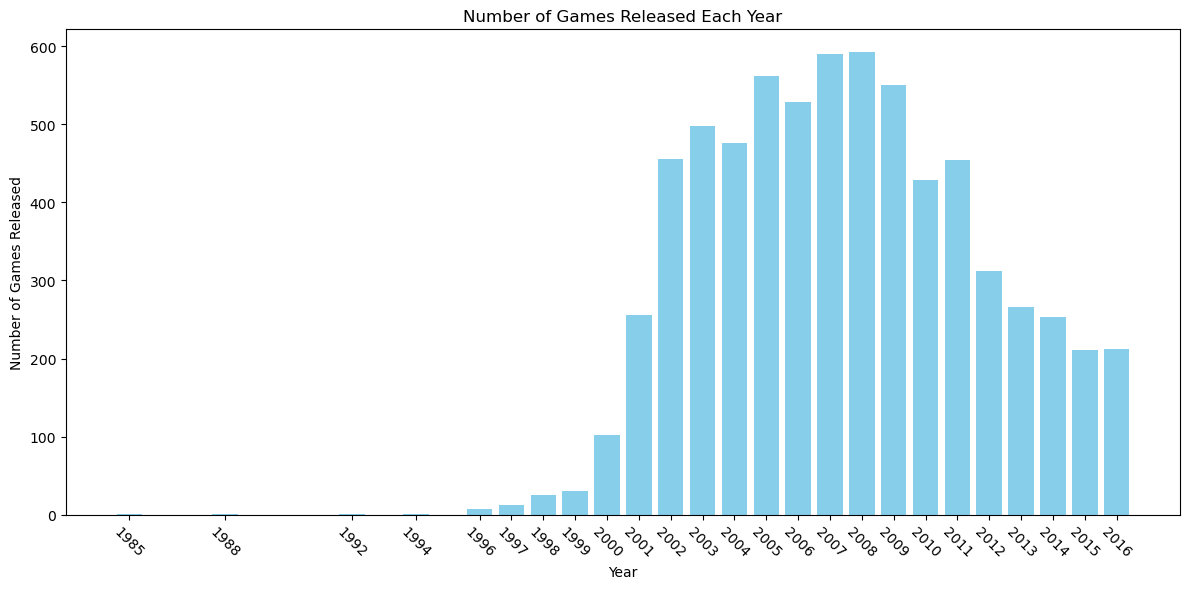

In [21]:
#1 - The number of games that were released in different years
games_per_year = df['year_of_release'].value_counts().sort_index()

#Print the number of games released per year
print("Number of games released per year: ")
print(games_per_year)

#Changing the size of the graph
plt.figure(figsize=(12, 6))

#Plotting the bar chart
plt.bar(games_per_year.index, games_per_year.values, align='center', color='skyblue')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(games_per_year.index, rotation=-45) 
plt.tight_layout()
plt.show()



2. Looking at the platforms with the most sales and printing out the top 5 to focus on. 

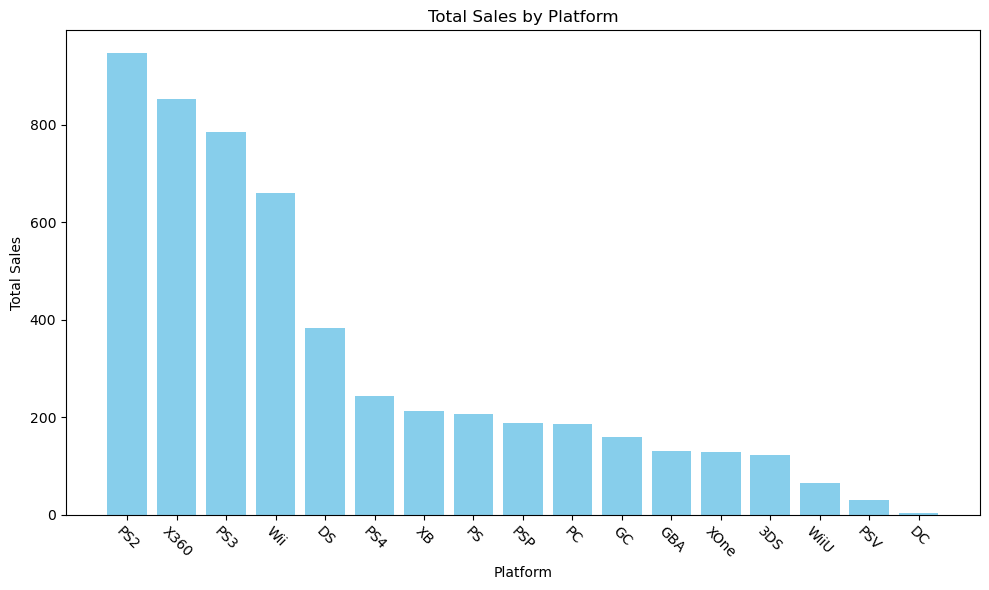

Platforms with the highest total sales:
platform
PS2     946.01
X360    853.24
PS3     784.44
Wii     658.97
DS      382.22
Name: total_sales, dtype: float64


In [24]:
#2 - Looking at the top platforms based on total sales
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#Changing the size of the graph
plt.figure(figsize=(10, 6)) 

#Plotting the bar chart
plt.bar(platform_sales.index, platform_sales.values, color='skyblue')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=-45)

plt.tight_layout()
plt.show()

#Printing top 5 platforms based on total sales
print("Platforms with the highest total sales:")
print(platform_sales.head(5))

3. Using the top 5 platfroms to graph the sale distribution for each platform

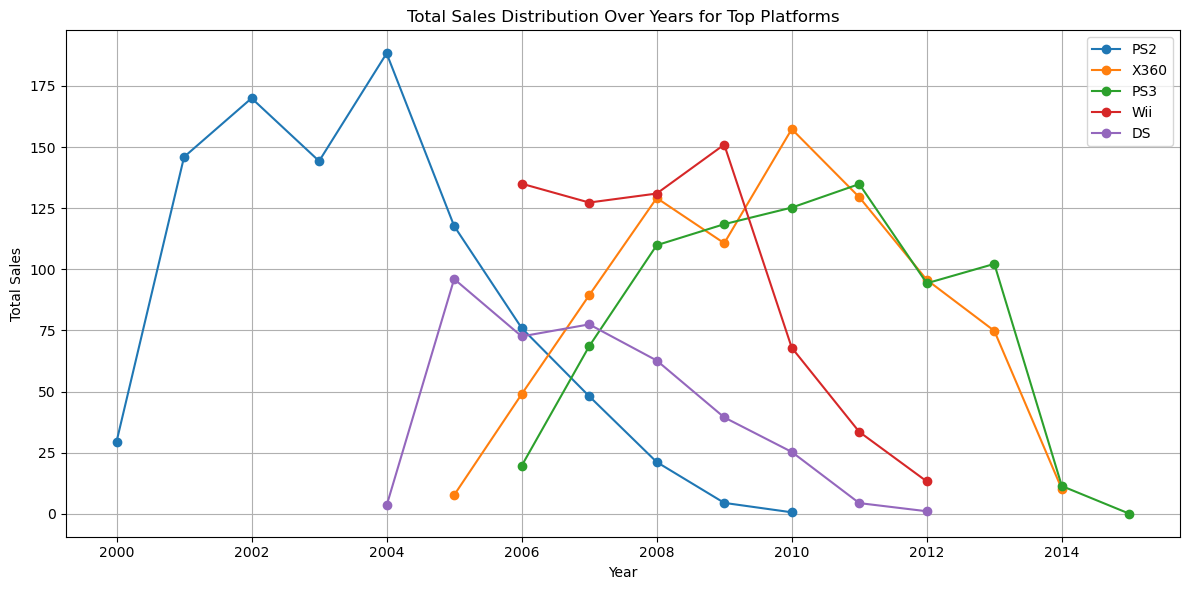

<class 'pandas.core.frame.DataFrame'>
Index: 3709 entries, 0 to 16613
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3709 non-null   object 
 1   platform         3709 non-null   object 
 2   year_of_release  3709 non-null   float64
 3   genre            3709 non-null   object 
 4   na_sales         3709 non-null   float64
 5   eu_sales         3709 non-null   float64
 6   jp_sales         3709 non-null   float64
 7   other_sales      3709 non-null   float64
 8   critic_score     3709 non-null   float64
 9   user_score       3709 non-null   float64
 10  rating           3709 non-null   object 
 11  total_sales      3709 non-null   float64
dtypes: float64(8), object(4)
memory usage: 376.7+ KB


In [26]:
#3 - Selecting the top 5 platforms
top_platforms = platform_sales.head(5).index

#Filtering data for the top_platforms
df_top_platforms = df[df['platform'].isin(top_platforms)]

#Calculating sales distribution
sales_distribution = df_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

#Adjusting the size of the line graph
plt.figure(figsize=(12, 6)) 

#Iterate over each platform to plot its sales over years
for platform in top_platforms:
    platform_data = sales_distribution[sales_distribution['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o', label=platform)

plt.title('Total Sales Distribution Over Years for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

df_top_platforms.info()

4. Lets look at the lifecycle of the top 5 platforms to understand when they started to when / if they have stopped selling games. 

After looking at the sales distribution PS2 was a bit out dated for my goal. Switching PS2 with PS4 to get a newer generation platform. 

In [28]:
top_platforms = ['PS4', 'X360', 'PS3', 'Wii', 'DS']

#Filter data for top platforms and years 2012 to 2017
df_filtered = df[(df['platform'].isin(top_platforms)) & (df['year_of_release'].between(2012, 2017))]

#List to store platform lifecycle information
platform_lifecycle = []

#Iterate over each top platform to calculate its lifecycle
for platform in top_platforms:
    platform_data = df_filtered[df_filtered['platform'] == platform]
    
    #Find the first and last year of sales within the filtered data
    first_year = platform_data['year_of_release'].min()
    last_year = platform_data['year_of_release'].max()
    
    #Calculate lifespan
    if pd.notna(first_year) and pd.notna(last_year):
        lifespan = last_year - first_year + 1 
    else:
        lifespan = None
    
    #Append platform lifecycle information as dictionary to list
    platform_lifecycle.append({
        'Platform': platform,
        'First Year': int(first_year),
        'Last Year': int(last_year),
        'Lifespan': int(lifespan)
    })

#Convert list of dictionaries to DataFrame
platform_lifecycle_df = pd.DataFrame(platform_lifecycle)

#Display platform lifecycle information for top platforms and years 2012 to 2017
print("Platform Lifecycle Information (Top Platforms, 2012-2017):")
print(platform_lifecycle_df)

Platform Lifecycle Information (Top Platforms, 2012-2017):
  Platform  First Year  Last Year  Lifespan
0      PS4        2013       2016         4
1     X360        2012       2014         3
2      PS3        2012       2015         4
3      Wii        2012       2012         1
4       DS        2012       2012         1


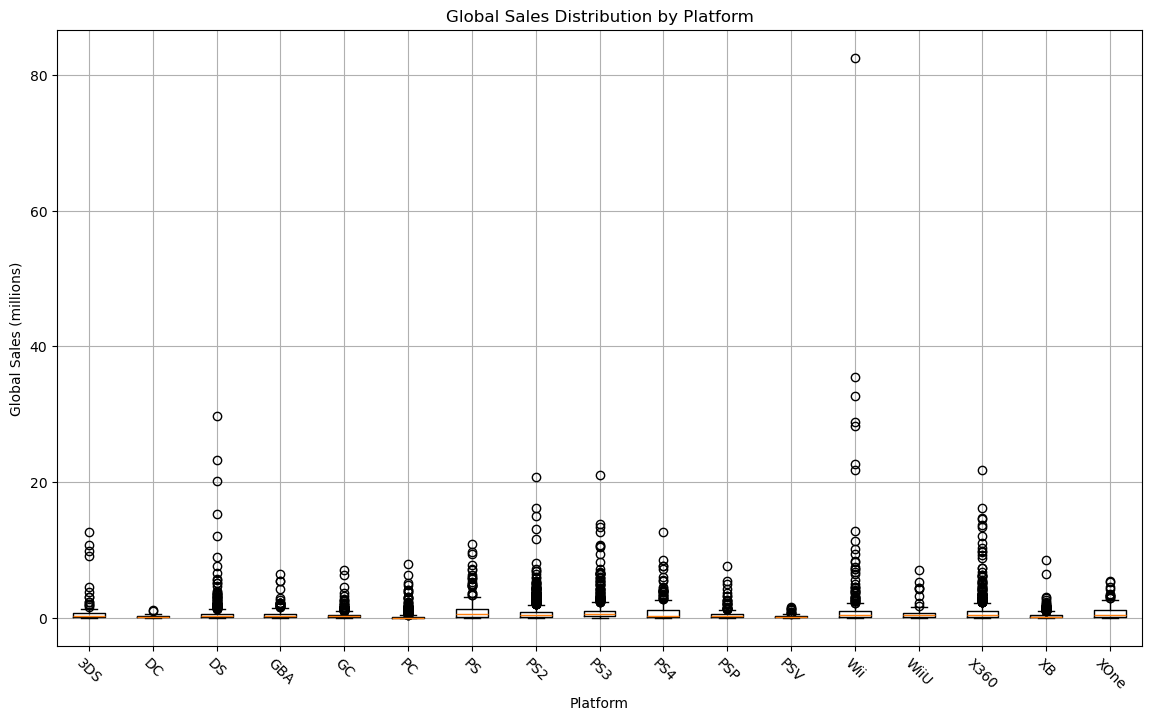

In [29]:
platform_sales = df.groupby('platform')['total_sales'].apply(list).reset_index()

# Create a box plot using matplotlib.pyplot
plt.figure(figsize=(14, 8))
plt.boxplot(platform_sales['total_sales'], labels=platform_sales['platform'])

plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=-45)
plt.grid(True)

plt.show()

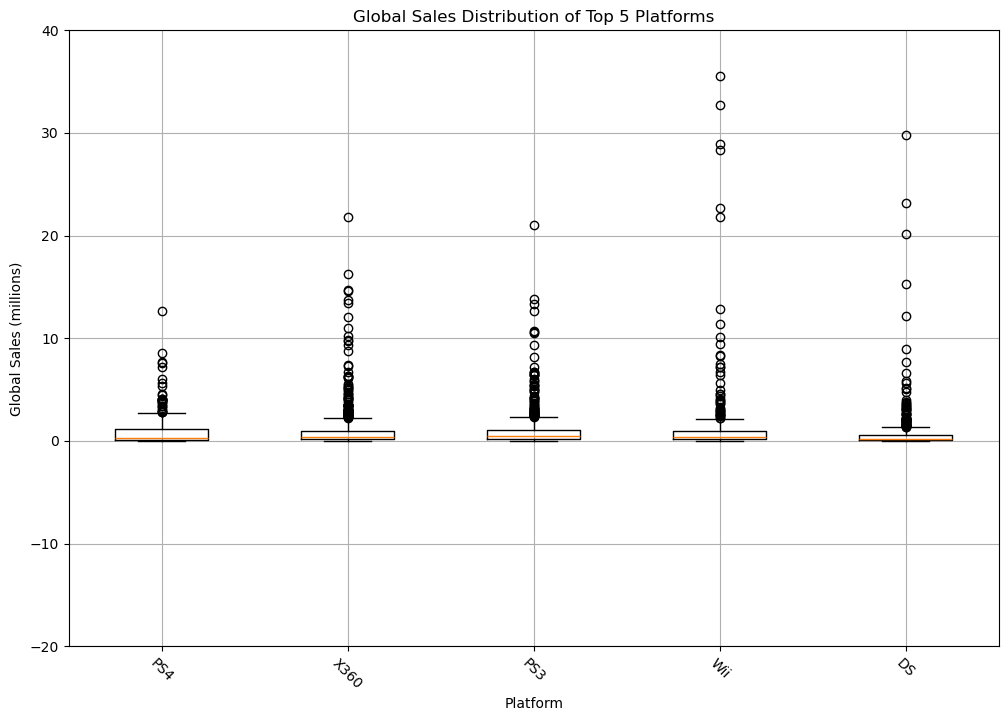

In [30]:
top_platforms = ['PS4', 'X360', 'PS3', 'Wii', 'DS']

# Filter data for the top platforms
platform_sales_top = df[df['platform'].isin(top_platforms)]

# Create a box plot using matplotlib.pyplot
plt.figure(figsize=(12, 8))
plt.boxplot([platform_sales_top[platform_sales_top['platform'] == platform]['total_sales'] for platform in top_platforms],
            labels=top_platforms)

plt.title('Global Sales Distribution of Top 5 Platforms')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=-45)
plt.grid(True)

# Adjust y-axis limits if needed
plt.ylim(-20, 40)  # Adjust based on your data range

plt.show()

***Conclusion***

Based on the number of games released I wanated to utilize years 2001 (the start of the ramp up) and end with 2016. Then when I looked at the platforms by total sales and was shocked by what I saw. PS2 with the highest total sales followed by X360, PS3, Wii, and DS. I needed a little bit more information to be sure about what years I wanted to work with. So, we made a sale distribution graph which gave me alot of information about the lifecycle of each platform. 
 1. We see that DS and PS2 (our highest total sales by Platform) stopped making as many games and had no more sales. The DS stopped in 2013 with a life span of 9 years. The PS2 stopped in 2011 with a life span of 11 years. (Those 2 are out of the conversation)
 
 
 2. Now we have the X360, PS3, and Wii. The Wii had a really strong start with a new type of system no ones ever seen before but had a very quick decent. As for the X360 and PS3 had a simular path slow start peak around the same time and gradually slowed down over the years reaching 2016. Probably due to the newer generation of platforms coming out like the PS4 and Xbox1. Although they aren't in the top 5 platforms I think focusing on the new generation platforms with benefit us more going into 2017. 
 
 
 3. Areas of intrest: Years 2012-2016
  1. X360
  2. PS3
  3. XOne
  4. PS4
  6. PC
  

***Filtering the data to the correct platoforms / years selected***

In [33]:
#Platforms X360, PS3, Wii, XOne, PS4, PC
platforms = ['X360', 'PS3', 'Wii', 'XOne', 'PS4','PC']
df_selected_platforms = df[df['platform'].isin(platforms)]

#Filter data for years 2005 to 2016
df_selected_platforms = df_selected_platforms[(df_selected_platforms['year_of_release'] >= 2005) & 
                                              (df_selected_platforms['year_of_release'] <= 2016)]



df_selected_platforms.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3062 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3062 non-null   object 
 1   platform         3062 non-null   object 
 2   year_of_release  3062 non-null   float64
 3   genre            3062 non-null   object 
 4   na_sales         3062 non-null   float64
 5   eu_sales         3062 non-null   float64
 6   jp_sales         3062 non-null   float64
 7   other_sales      3062 non-null   float64
 8   critic_score     3062 non-null   float64
 9   user_score       3062 non-null   float64
 10  rating           3062 non-null   object 
 11  total_sales      3062 non-null   float64
dtypes: float64(8), object(4)
memory usage: 311.0+ KB


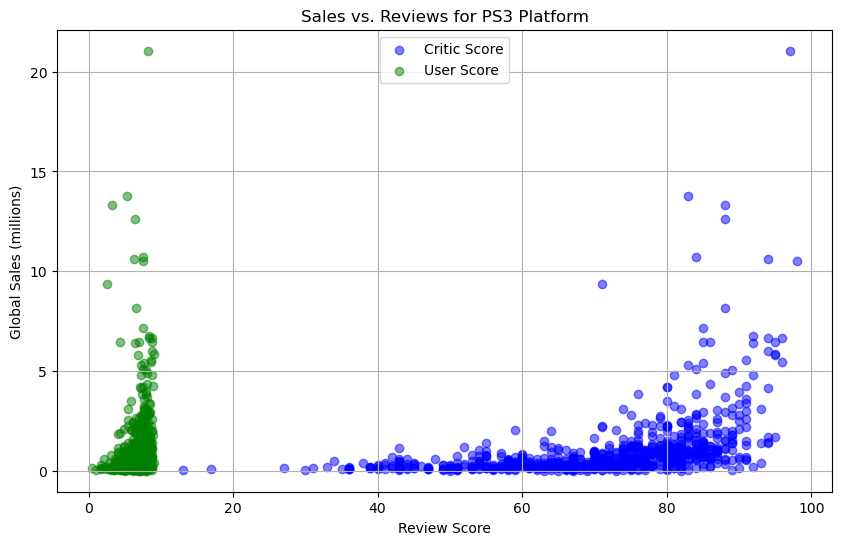

Correlation between Critic Score and Sales: 0.43
Correlation between User Score and Sales: 0.15


In [34]:
#Filter data for the PS3 platform
platform = 'PS3'
df_ps3 = df_selected_platforms[df_selected_platforms['platform'] == platform]

#Clean data: Handle missing values if any
df_ps3 = df_ps3.dropna(subset=['critic_score', 'user_score', 'total_sales'])


#Build scatter plot for critic score vs. sales
plt.figure(figsize=(10, 6))
plt.scatter(df_ps3['critic_score'], df_ps3['total_sales'], color='blue', label='Critic Score', alpha=0.5)

#Add scatter plot for user score vs. sales
plt.scatter(df_ps3['user_score'], df_ps3['total_sales'], color='green', label='User Score', alpha=0.5)

plt.title(f'Sales vs. Reviews for {platform} Platform')
plt.xlabel('Review Score')
plt.ylabel('Global Sales (millions)')
plt.legend()
plt.grid(True)
plt.show()

#Calculate correlation coefficients
corr_critic = df_ps3['critic_score'].corr(df_ps3['total_sales'])
corr_user = df_ps3['user_score'].corr(df_ps3['total_sales'])

print(f'Correlation between Critic Score and Sales: {corr_critic:.2f}')
print(f'Correlation between User Score and Sales: {corr_user:.2f}')

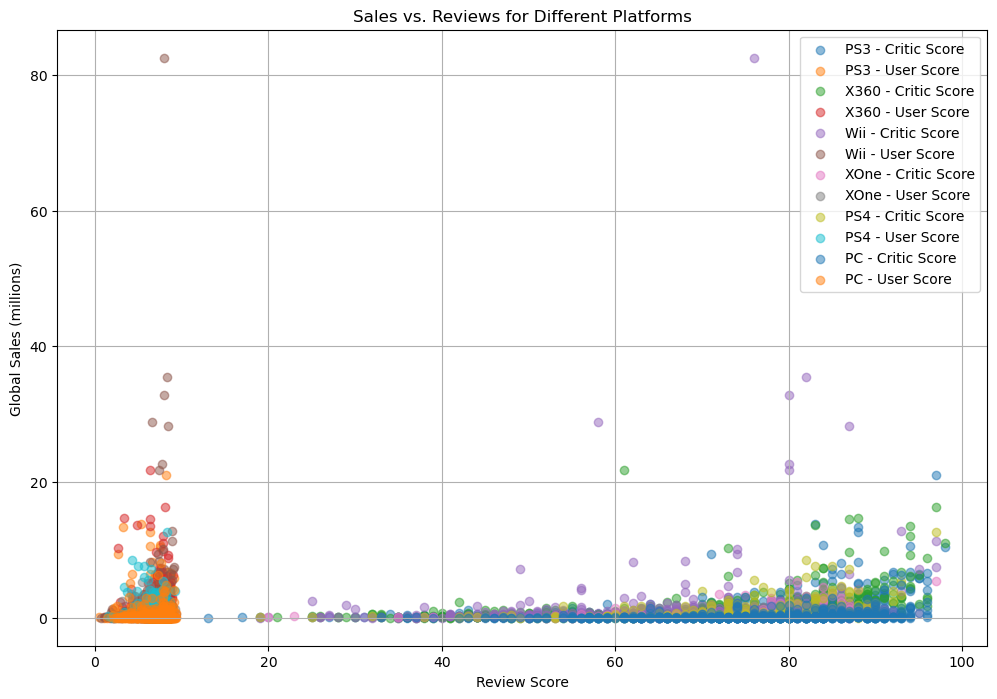

In [35]:
#Filter data for multiple platforms (PS3, Xbox 360, Wii, XOne, PS4, PC)
platforms = ['PS3', 'X360', 'Wii', 'XOne', 'PS4', 'PC']
df_selected_platforms = df[df['platform'].isin(platforms)]

#Build scatter plot for critic score vs. sales
plt.figure(figsize=(12, 8))

#Iterate through each platform
for platform in platforms:
    platform_data = df_selected_platforms[df_selected_platforms['platform'] == platform]
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'], label=f'{platform} - Critic Score', alpha=0.5)

    #Add scatter plot for user score vs. sales
    plt.scatter(platform_data['user_score'], platform_data['total_sales'], label=f'{platform} - User Score', alpha=0.5)

plt.title('Sales vs. Reviews for Different Platforms')
plt.xlabel('Review Score')
plt.ylabel('Global Sales (millions)')
plt.legend()
plt.grid(True)
plt.show()

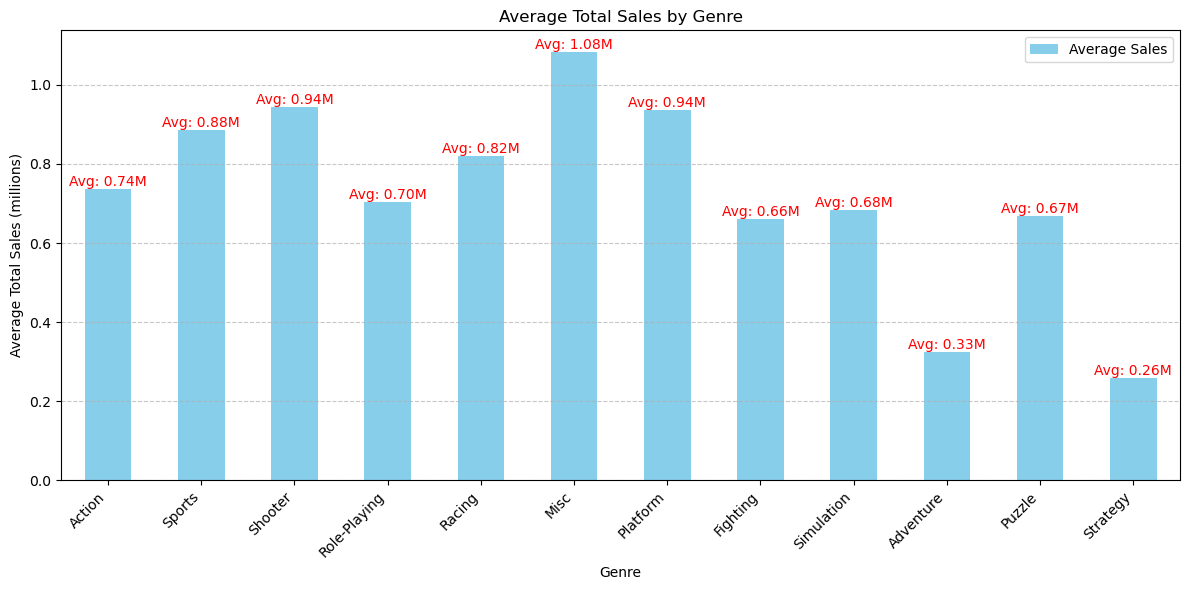

In [36]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

#Calculate average total sales per genre
average_sales_per_genre = df.groupby('genre')['total_sales'].mean().loc[genre_sales.index]

#Plotting the average sales by genre
plt.figure(figsize=(12, 6))
average_sales_per_genre.plot(kind='bar', color='skyblue', label='Average Sales')
plt.title('Average Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Sales (millions)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Annotate with average values
for i, sales in enumerate(average_sales_per_genre):
    plt.text(i, sales, f'Avg: {sales:.2f}M', ha='center', va='bottom', fontsize=10, color='red')

plt.legend()
plt.tight_layout()
plt.show()


So genre action had the most sales, but Misc is on average more profitable than any other genre. 

***User Profile for each region***

Top 5 Platforms in North America:
platform
X360    533.43
PS2     472.65
Wii     342.91
PS3     341.62
DS      173.40
Name: na_sales, dtype: float64

Top 5 Platforms in Europe:
platform
PS3     273.49
PS2     255.14
X360    234.33
Wii     204.13
PS4     111.78
Name: eu_sales, dtype: float64

Top 5 Platforms in Japan:
platform
DS     83.66
PS2    75.81
PS3    54.52
Wii    52.37
PS     38.85
Name: jp_sales, dtype: float64


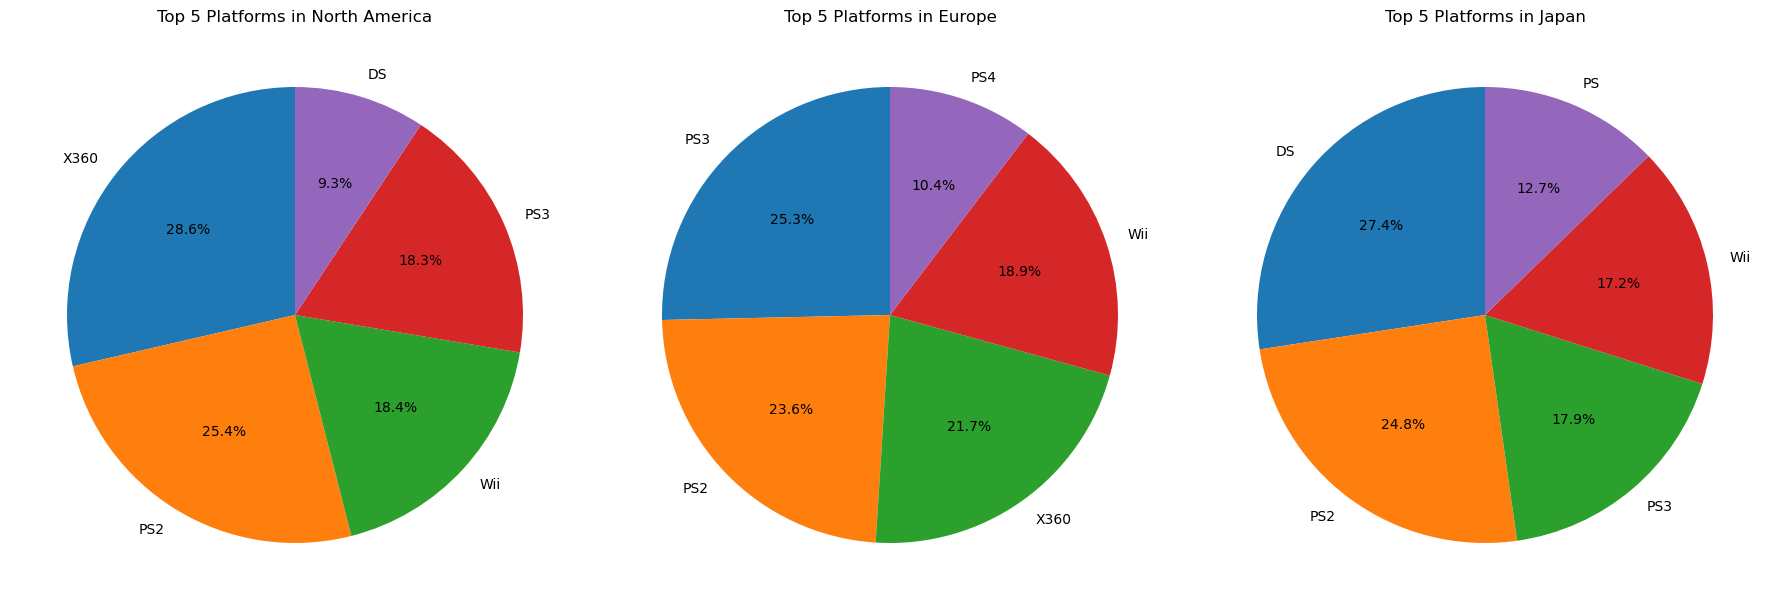

In [39]:
platform_sales_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 Platforms in North America:")
print(platform_sales_na)
print()

print("Top 5 Platforms in Europe:")
print(platform_sales_eu)
print()

print("Top 5 Platforms in Japan:")
print(platform_sales_jp)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

#Plotting pie chart for North America
ax1.pie(platform_sales_na, labels=platform_sales_na.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Top 5 Platforms in North America')

#Plotting pie chart for Europe
ax2.pie(platform_sales_eu, labels=platform_sales_eu.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Top 5 Platforms in Europe')

#Plotting pie chart for Japan
ax3.pie(platform_sales_jp, labels=platform_sales_jp.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Top 5 Platforms in Japan')

plt.tight_layout()
plt.show()

Top 5 Genres in North America:
genre
Action     591.23
Sports     457.52
Shooter    448.76
Racing     225.59
Misc       222.05
Name: na_sales, dtype: float64

Top 5 Genres in Europe:
genre
Action     387.78
Shooter    261.12
Sports     247.42
Racing     164.66
Misc       120.46
Name: eu_sales, dtype: float64

Top 5 Genres in Japan:
genre
Role-Playing    122.47
Action           76.17
Platform         43.09
Sports           34.54
Misc             33.22
Name: jp_sales, dtype: float64


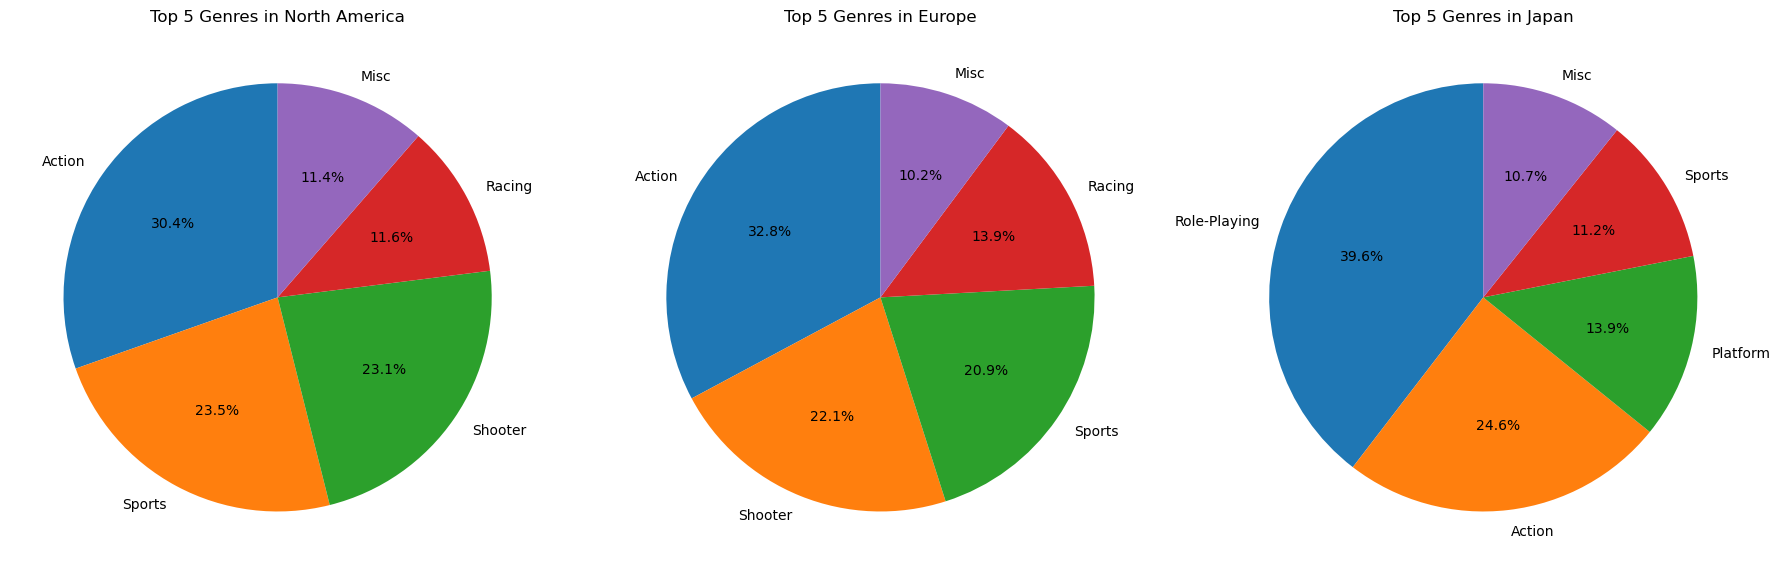

In [40]:
genre_sales_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 Genres in North America:")
print(genre_sales_na)
print()

print("Top 5 Genres in Europe:")
print(genre_sales_eu)
print()

print("Top 5 Genres in Japan:")
print(genre_sales_jp)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

#Plotting pie chart for North America
ax1.pie(genre_sales_na, labels=genre_sales_na.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Top 5 Genres in North America')

#Plotting pie chart for Europe
ax2.pie(genre_sales_eu, labels=genre_sales_eu.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Top 5 Genres in Europe')

#Plotting pie chart for Japan
ax3.pie(genre_sales_jp, labels=genre_sales_jp.index, autopct='%1.1f%%', startangle=90)
ax3.set_title('Top 5 Genres in Japan')

plt.tight_layout()
plt.show()

In [41]:
rating_sales_na = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_sales_eu = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_sales_jp = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("ESRB Ratings Impact on Sales in North America:")
print(rating_sales_na)
print()

print("ESRB Ratings Impact on Sales in Europe:")
print(rating_sales_eu)
print()

print("ESRB Ratings Impact on Sales in Japan:")
print(rating_sales_jp)

ESRB Ratings Impact on Sales in North America:
rating
E       986.02
M       724.61
T       694.23
E10+    286.03
AO        1.26
K-A       0.26
RP        0.00
Name: na_sales, dtype: float64

ESRB Ratings Impact on Sales in Europe:
rating
E       590.77
M       467.07
T       396.82
E10+    155.94
AO        0.61
K-A       0.16
RP        0.03
Name: eu_sales, dtype: float64

ESRB Ratings Impact on Sales in Japan:
rating
E       190.67
T       144.66
M        62.28
E10+     38.81
K-A       1.46
AO        0.00
RP        0.00
Name: jp_sales, dtype: float64


In [42]:
df_xbox_one = df[df['platform'] == 'XOne']
df_pc = df[df['platform'] == 'PC']

selected_genres = ['Action', 'Sports']
df_selected_genres = df[df['genre'].isin(selected_genres)]

df_action = df_selected_genres[df_selected_genres['genre'] == 'Action']
df_sports = df_selected_genres[df_selected_genres['genre'] == 'Sports']

#Hypothesis 1: Average user ratings of Xbox One and PC are the same
statistic, p_value = stats.ttest_ind(df_xbox_one['user_score'], df_pc['user_score'], equal_var=True)
print(f"Hypothesis 1: T-statistic = {statistic}, p-value = {p_value}")

#Hypothesis 2: Average user ratings for Action and Sports genres are different
statistic, p_value = stats.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var=True)
print(f"Hypothesis 2: T-statistic = {statistic}, p-value = {p_value}")

Hypothesis 1: T-statistic = -4.240196550569419, p-value = 2.4909638124872165e-05
Hypothesis 2: T-statistic = -0.28800269782055304, p-value = 0.7733678964505164


***Hypothesis Testing***

**1.Average user ratings of the Xbox One and PC platforms are the same.**

Null Hypothesis (H₀):
The average user ratings of the Xbox One platform are equal to the average user ratings of the PC platform. 



Alternative Hypothesis (H₁):
The average user ratings of the Xbox One platform are not equal to the average user ratings of the PC platform.

**2.Average user ratings for the Action and Sports genres are different.**

Null Hypothesis (H₀):
The average user ratings of the Action genre are equal to the average user ratings of the Sports genre.


Alternative Hypothesis (H₁):
The average user ratings of the Action genre are different from the average user ratings of the Sports genre.


***Overall Conslusion***

**1.Average user ratings of the Xbox One and PC platforms are the same.**


   There is sufficient evidence to suggest that average user ratings of Xbox One and PC platforms are statistically different. 
    
**2.Average user ratings for the Action and Sports genres are different.**

   There is not enough evidence to suggest that average user ratings for Action and Sports genres are statistically different.


